Load data. Has a total stellar mass cut of $10^9$ (completeness limit for the observations) 

In [3]:
#Sets plot defaults
import matplotlib
matplotlib.rcParams['font.size'] = (20)
matplotlib.rcParams['figure.figsize'] = (10,7)

import numpy as np
from dragons import meraxes
import os
import matplotlib.pyplot as plt
import sys
import ContourPlot as cp

#Setup
cosmo = {'omega_M_0' : 0.308,
'omega_lambda_0' : 0.692,
'omega_b_0' : 0.04839912,
'omega_n_0' : 0.0,
'N_nu' : 0,
'h' : 0.678,
'n' : 0.968,
'sigma_8' : 0.815
}
data_folder='/home/mmarshal/data_dragons/'
meraxes_loc='/output/meraxes.hdf5'

#filename='bulges_update1102_full'
#snapshot=158
filename='bulges_tiamat125'
snapshot=213
gals=meraxes.io.read_gals(data_folder+filename+meraxes_loc,\
                                          snapshot=snapshot,props=['StellarMass',\
                                          'BulgeStellarMass','StellarDiskScaleLength',\
                                          'GhostFlag','Type'],\
                                          h=cosmo['h'],quiet=True)
gals=gals[gals["GhostFlag"]==0]
gals=gals[gals["Type"]==0]
gals=gals[gals['StellarMass']*1e10>1e9]

Plot M vs R relations for complete galaxy sample

/home/mmarshal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mmarshal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


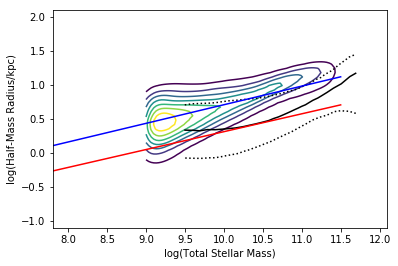

In [12]:
import pandas as pd

disk_mass=np.log10((gals['StellarMass']-gals['BulgeStellarMass'])*1e10)
half_mass_rad=np.log10(1.67835*gals['StellarDiskScaleLength']*1000)


#cp.contour_plot(disk_mass,half_mass_rad,'log(Stellar Disk Mass)','log(Half-Mass Radius/kpc)',[7.8,12.1],[-1.1,2.1])
#plt.show()

total_mass=np.log10(gals['StellarMass']*1e10)

cp.contour_plot(total_mass,half_mass_rad,'log(Total Stellar Mass)','log(Half-Mass Radius/kpc)',[7.8,12.1],[-1.1,2.1])
Hearin=pd.read_csv('HearinData.csv')
Hearin_U=pd.read_csv('HearinData_Upper.csv')
Hearin_L=pd.read_csv('HearinData_Lower.csv') #90% confidence interval
plt.plot(np.log10(Hearin['M']),np.log10(Hearin['R']),'k')
plt.plot(np.log10(Hearin_U['M']),np.log10(Hearin_U['R']),'k:')
plt.plot(np.log10(Hearin_L['M']),np.log10(Hearin_L['R']),'k:')

##Lange+16. R=a(M/10^10)^b
#For disks, a=5.141 kpc, b=0.274
M=np.logspace(7.5,11.5,base=10)
R=5.141*(M/1e10)**0.274
plt.plot(np.log10(M),np.log10(R),'b')
#For spheroids, a=2.063, b=0.263
R=2.063*(M/1e10)**0.263
plt.plot(np.log10(M),np.log10(R),'r')
#Shown are the final z = 0 disc (top) and spheroid (bottom)
#M–Re relations. The disc relation consists of Sd-Irr galaxies, early-type
#disc components and reconstituted late-type two-component systems. The
#spheroid relation is composed of ellipticals, early-type bulges and LBS.

plt.show()

Plot M vs R relations for disk-dominated galaxies

In [15]:
run DiskSize.py


/mnt/home/mmarshal/PhD/simulation_codes/DiskSize.py:56: RuntimeWarning: invalid value encountered in true_divide
  disk_mass=np.log10((disks['StellarMass']-disks['BulgeStellarMass'])*1e10)
/mnt/home/mmarshal/PhD/simulation_codes/DiskSize.py:56: RuntimeWarning: invalid value encountered in less
  disk_mass=np.log10((disks['StellarMass']-disks['BulgeStellarMass'])*1e10)
/home/mmarshal/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/mmarshal/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
